## Pandas

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline

#### Далее мы будем рассматривать датасет с реальными данными из нефтяной отрасли: дебит жидкости после ГТМ (геолого-технического мероприятия)

#### Описание смысла признаков
Признак | Описание
--------| -------------
Dnytr | диаметр трубы
H_din |   Динамический уровень
Q_OIS |   Дебит жидкости
NomMoschn |	Номинальная мощность
Hperf |	Глубина перфораций
NomNapor	| Номинальный напор
Water_cut |	Обводненность
NomPodacha	| Номинальная подача
Dnkt |	Диаметр НКТ
H_sp	| Глубина спуска
P_plst	| Пластовое давление
Hvd	| Глубина верхних дыр перфораций
Extend_Hvd	| Удлинение верхних дыр перфораций
PlNeft |	Плотность нефти
VyazkNeft	| Вязкость нефти
SumTolshin	| Сумма нефтенасыщенных толщин
P_zatr	| Затрубное давление
PlVody |	Плотность воды
Pnas	| Давление насыщения
Inject_0,1,2,3	| Приемистость ближайших нагнетательных скважин
BHP	| Забойное давление
State	| Состояние скважины (работает, не работает)
IDN_type |	Тип ГТМ (ИДН или ППР)
NalichSep |	Наличие сепаратора
Formation_lbl |	Метка пласта
state_age	| Возраст состояние
Date |	Дата
Start_date	| Дата начала ГТМ
Well_ID|	ID скважины
id	ID| ГТМ
VNR|	Признак выхода на режим
Date_VNR|	Дата выхода на режим
GTM_type_lbl|	Метка типа ГТМ 

#### Описание задачи
На основе предоставленных данных построить модель прогнозирования дебита жидкости (признак ‘Q_OIS’) после геолого-технического мероприятия (ГТМ) – итенсификация добычи нефти (ИДН). Прогноз необходимо сделать на дату выхода скажины на режим (дата ВНР). Точка прогноза однозначно задается бинарным признаком ‘VNR’ (точка прогноза – VNR=1).

Каждому событию ИДН предшествует своя история, однозначно определяемая признаком ‘id’. В тренировочном датасете ‘contest_train_df.csv’ для каждого факта ИДН (признак ‘id’) известно значение дебита жидкости ‘Q_OIS’ на дату ВНР (VNR=1).

Также в качестве дополнительной информации дана таблица со всеми типами ГТМ, проведенными на исследуемых скважинах.

In [2]:
# чтение данных из файла с расширением .csv
df = pd.read_csv('contest_train_df.csv')
# общая информация о датафрейме
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2782441 entries, 0 to 2782440
Data columns (total 34 columns):
Dnytr            float64
H_din            float64
Q_OIS            float64
NomMoschn        float64
Hperf            float64
NomNapor         float64
Water_cut        float64
NomPodacha       float64
Dnkt             float64
H_sp             float64
P_plst           float64
Hvd              float64
Extend_Hvd       float64
PlNeft           float64
VyazkNeft        float64
SumTolshin       float64
P_zatr           float64
PlVody           float64
Pnas             float64
Inject_0         float64
Inject_1         float64
Inject_2         float64
Inject_3         float64
BHP              float64
State            int64
IDN_type         int64
NalichSep        float64
Formation_lbl    object
state_age        float64
Date             object
Start_date       object
Well_ID          int64
id               int64
VNR              int64
dtypes: float64(26), int64(5), object(3)
memory us

In [3]:
# Имя первого признака
df.columns

Index([u'Dnytr', u'H_din', u'Q_OIS', u'NomMoschn', u'Hperf', u'NomNapor',
       u'Water_cut', u'NomPodacha', u'Dnkt', u'H_sp', u'P_plst', u'Hvd',
       u'Extend_Hvd', u'PlNeft', u'VyazkNeft', u'SumTolshin', u'P_zatr',
       u'PlVody', u'Pnas', u'Inject_0', u'Inject_1', u'Inject_2', u'Inject_3',
       u'BHP', u'State', u'IDN_type', u'NalichSep', u'Formation_lbl',
       u'state_age', u'Date', u'Start_date', u'Well_ID', u'id', u'VNR'],
      dtype='object')

In [4]:
# Обращение к колонке DataFrame по имени
# слева - индекс, справа - значение
# возвращается тип Series
df['Dnkt']

0                NaN
1                NaN
2                NaN
3                NaN
4                NaN
5                NaN
6                NaN
7                NaN
8                NaN
9                NaN
10               NaN
11               NaN
12               NaN
13               NaN
14               NaN
15               NaN
16               NaN
17               NaN
18               NaN
19               NaN
20               NaN
21               NaN
22               NaN
23               NaN
24               NaN
25               NaN
26               NaN
27               NaN
28               NaN
29               NaN
             ...    
2782411    73.000000
2782412    62.633051
2782413    73.000000
2782414    74.163636
2782415    75.484140
2782416    73.000000
2782417    73.000000
2782418    73.000000
2782419    73.000000
2782420    73.376923
2782421    73.000000
2782422    73.000000
2782423    73.000000
2782424    74.134596
2782425    73.000000
2782426    73.000000
2782427    73

In [5]:
# Получение элемента Series по индексу
df['H_sp'].iloc[2]

2100.0

In [6]:
# Вопрос 1. Какое значение лежит в колонке Formation_lbl по индексу 297?

# код тут
df['Formation_lbl'][297]

'23'

### Статистика по DataFrame и Series
Ещё несколько полезных функций для получения информации о данных в датафрейме:

- DataFrame.describe() - получение описательной статистики
- Series().value_counts - подсчёт поличества вхождений значений в Series
- Series.unique(), Series.nunique() - множество уникальных значений в Series и количество уникальных
- DataFrame.head() - первые несколько записей DataFrame
- Series.max(), Series.min() - максимальное и минимальное значения
- Series.mean(), Series.median() - среднее и медианное значения

In [7]:
# сначала хочется просто посмотреть на данные
# выведем первые 10 записей датасета
df.head(10)

,Dnytr,H_din,Q_OIS,NomMoschn,Hperf,NomNapor,Water_cut,NomPodacha,Dnkt,H_sp,...,State,IDN_type,NalichSep,Formation_lbl,state_age,Date,Start_date,Well_ID,id,VNR
0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1487.0,...,0,1,NaN,"2,5",30.0,1965-01-16,1965-06-21,4473,30413,0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1320.0,...,1,1,NaN,"24,26",31.0,1965-01-16,1965-03-12,3905,26087,0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2100.0,...,1,1,NaN,38,131.0,1965-01-16,1965-06-29,8467,58863,0
3,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,1,NaN,"45,46",28.0,1965-01-16,1965-05-05,8092,56313,0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2321.0,...,1,1,NaN,"2,5",616.0,1965-01-16,1965-06-21,4136,27819,0
5,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,1,NaN,45,52.0,1965-01-16,1965-06-04,8090,56302,0
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2185.0,...,1,1,NaN,23,169.0,1965-01-16,1965-06-12,769,4377,0
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2085.0,...,1,1,NaN,7,547.0,1965-01-16,1965-07-08,6908,46487,0
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,1,NaN,23,311.0,1965-01-16,1965-03-23,1210,6782,0
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1620.0,...,1,1,NaN,23,374.0,1965-01-16,1965-03-23,1611,9600,0


In [8]:
# размер таблицы, возвращается кортеж (количество записей, количество столбцов)
df.shape

(2782441, 34)

In [9]:
# как оценить данные в общем?
# полученим статистику по датафрейму
df.describe()

,Dnytr,H_din,Q_OIS,NomMoschn,Hperf,NomNapor,Water_cut,NomPodacha,Dnkt,H_sp,...,Inject_2,Inject_3,BHP,State,IDN_type,NalichSep,state_age,Well_ID,id,VNR
count,2.684735e+06,172579.000000,1.302361e+06,2.617663e+06,2.656718e+06,2.659152e+06,1.060342e+06,2.664482e+06,2.680877e+06,2.765985e+06,...,1.648875e+06,1.551415e+06,545615.000000,2.782441e+06,2.782441e+06,2.685115e+06,2.782441e+06,2.782441e+06,2.782441e+06,2.782441e+06
mean,1.312891e+02,1963.347570,1.162965e+02,1.014737e+02,3.398602e+01,2.097440e+03,5.606606e+01,1.821768e+02,7.162893e+01,2.386648e+03,...,3.628271e+02,3.676090e+02,75.595258,9.086626e-01,4.507970e-01,4.974603e-01,3.924990e+02,4.024384e+03,2.720821e+04,5.614495e-03
std,8.370227e+00,582.045551,1.391846e+02,6.709455e+01,3.802164e+01,3.081066e+02,3.442464e+01,1.585073e+02,4.264539e+00,3.605204e+02,...,2.660894e+02,2.605912e+02,33.600845,2.880884e-01,4.975733e-01,4.999936e-01,3.533261e+02,2.404601e+03,1.693324e+04,7.471930e-02
min,8.900000e+01,0.000000,0.000000e+00,1.100000e+01,6.000000e-01,1.840000e+02,0.000000e+00,2.000000e-01,1.000000e+00,1.000000e+00,...,0.000000e+00,8.235294e-01,-66.150000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00
25%,1.270000e+02,1651.000000,2.500000e+01,5.000000e+01,1.200000e+01,1.911000e+03,2.000000e+01,6.000000e+01,7.300000e+01,2.200000e+03,...,1.696774e+02,1.749333e+02,51.400000,1.000000e+00,0.000000e+00,0.000000e+00,1.320000e+02,2.009000e+03,1.278000e+04,0.000000e+00
50%,1.290000e+02,2080.000000,6.700000e+01,7.460000e+01,2.300000e+01,2.154000e+03,6.100000e+01,1.250000e+02,7.300000e+01,2.411000e+03,...,3.029032e+02,3.123871e+02,69.300000,1.000000e+00,0.000000e+00,0.000000e+00,2.830000e+02,3.911000e+03,2.613000e+04,0.000000e+00
75%,1.306000e+02,2380.000000,1.600000e+02,1.400000e+02,4.400000e+01,2.313000e+03,9.100000e+01,2.500000e+02,7.300000e+01,2.640000e+03,...,4.955161e+02,5.091935e+02,92.960000,1.000000e+00,1.000000e+00,1.000000e+00,5.500000e+02,5.717000e+03,3.931600e+04,0.000000e+00
max,2.230000e+02,3292.000000,1.630000e+03,6.600000e+02,5.530000e+02,3.738000e+03,9.990000e+01,1.325000e+03,1.140000e+02,3.481000e+03,...,4.277480e+03,2.246143e+03,320.720000,1.000000e+00,1.000000e+00,1.000000e+00,3.125000e+03,8.693000e+03,6.010900e+04,1.000000e+00


In [10]:
# если хочется посмотреть только на часть выбранных признаков
# стоит выделить их и заново сделать describe

df[['Q_OIS', # этот признак интересует, потому что он целевой
   'VNR',   # этот признак является важным идентифкатором
    'Water_cut' # это признак, связанный с жидкостью
   ]].describe()

,Q_OIS,VNR,Water_cut
count,1.302361e+06,2.782441e+06,1.060342e+06
mean,1.162965e+02,5.614495e-03,5.606606e+01
std,1.391846e+02,7.471930e-02,3.442464e+01
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.500000e+01,0.000000e+00,2.000000e+01
50%,6.700000e+01,0.000000e+00,6.100000e+01
75%,1.600000e+02,0.000000e+00,9.100000e+01
max,1.630000e+03,1.000000e+00,9.990000e+01


In [11]:
# количество уникальных значений в признаке
df['VNR'].nunique()

2

In [12]:
# похоже, признак VNR бинарный - у него всего два уникальных значения
# убедимся, что эти два значения - 1 и 0
df['VNR'].value_counts()

0    2766819
1      15622
Name: VNR, dtype: int64

In [13]:
# Вопрос 2. Сколько в датасете признаков, у которых всего 2 уникальных значения?

# код тут
df.nunique()

Dnytr              101
H_din             3797
Q_OIS             2453
NomMoschn          168
Hperf              975
NomNapor          1550
Water_cut          673
NomPodacha         138
Dnkt              1674
H_sp              1828
P_plst           12379
Hvd               2950
Extend_Hvd        8080
PlNeft            2584
VyazkNeft         2426
SumTolshin         657
P_zatr             732
PlVody             473
Pnas              2998
Inject_0         34593
Inject_1         35878
Inject_2         36818
Inject_3         34084
BHP              55665
State                2
IDN_type             2
NalichSep            2
Formation_lbl       88
state_age         1546
Date              5467
Start_date        3895
Well_ID           7288
id               15622
VNR                  2
dtype: int64

In [14]:
# Вопрос 3. Сколько уникальных значений в признаке Water_cut?

# код тут
df['Water_cut'].nunique()

673

In [15]:
# Вопрос 4. Совпадает ли медиана и среднее у признака Extend_Hvd?

# код тут
df['Extend_Hvd'].mean() == df['Extend_Hvd'].median() 

False

In [16]:
# Вопрос 5. Какое максимальное значение у признака NomPodacha?

# код тут
df['NomPodacha'].max()

1325.0

### Преобразование данных

##### Пропуски
Пропуски - отсутствующие значения в данных. С пропусками в данных можно бороться несколькими способами: заполнять их, или удалять объекты с пропусками. Если пропусков немного, то удаление объектов с пропусками может быть приемлимо, однако во многих случаях пропуски предпочтительнее заполнить, чтобы не потерять нужную информацию.
Pandas предоставляет несколько методов для работы с пропусками:
- Series.isna() - возвращает True для каждого пропуска
- Series.dropna() - удаляет все пропуски
- Series.fillna() - заполняет пропуски

##### Дубликаты
Дубликаты - повторяющиеся значения в данных. Дубликаты вредны: они создают неверное представление о данных (распределениях) и часто являются причиной ошибок (в данных и в процессе их обработки).
Для работы с дубликатами в Pandas:
- DataFrame.drop_duplicates() - удаляет все дублирующиеся значения

In [17]:
# так как признак VNR оказался бинарным, преобразуем его к нужному типу
df['VNR'] = df['VNR'].astype(bool)

In [18]:
df['VNR']

0          False
1          False
2          False
3          False
4          False
5          False
6          False
7          False
8          False
9          False
10         False
11         False
12         False
13         False
14         False
15         False
16         False
17         False
18         False
19         False
20         False
21         False
22         False
23         False
24         False
25         False
26         False
27         False
28         False
29         False
           ...  
2782411     True
2782412     True
2782413    False
2782414     True
2782415     True
2782416    False
2782417    False
2782418     True
2782419    False
2782420    False
2782421    False
2782422    False
2782423     True
2782424     True
2782425    False
2782426    False
2782427     True
2782428    False
2782429    False
2782430     True
2782431     True
2782432    False
2782433     True
2782434    False
2782435     True
2782436     True
2782437     True
2782438     Tr

In [19]:
# в выводе первых строк датасета было видно очень много пропусков (NaN)
# а сколько их точно?
# количество пропусков по всем признакам (колонкам)
# df.count() - количество заполненных по признакам (колонкам)
for col in df.columns:
    print('Признак = {:<13}: количество пропусков = {}'.format(col, df[col].isna().sum()))

Признак = Dnytr        : количество пропусков = 97706
Признак = H_din        : количество пропусков = 2609862
Признак = Q_OIS        : количество пропусков = 1480080
Признак = NomMoschn    : количество пропусков = 164778
Признак = Hperf        : количество пропусков = 125723
Признак = NomNapor     : количество пропусков = 123289
Признак = Water_cut    : количество пропусков = 1722099
Признак = NomPodacha   : количество пропусков = 117959
Признак = Dnkt         : количество пропусков = 101564
Признак = H_sp         : количество пропусков = 16456
Признак = P_plst       : количество пропусков = 99888
Признак = Hvd          : количество пропусков = 98201
Признак = Extend_Hvd   : количество пропусков = 98300
Признак = PlNeft       : количество пропусков = 97807
Признак = VyazkNeft    : количество пропусков = 141739
Признак = SumTolshin   : количество пропусков = 157177
Признак = P_zatr       : количество пропусков = 2609862
Признак = PlVody       : количество пропусков = 97807
Признак = Pna

In [20]:
# посмотрим, сколько останется данных
# если просто убрать все объекты (строки) в которых есть хотя бы один пропуск:
df.dropna().shape

(32566, 34)

In [21]:
# если убрать все объекты с пропусками, то мы теряем очень много данных
# проверим, есть ли строки, в которых пропущены воообще все значения?
df.dropna(how='all').shape[0] != df.shape[0]

False

In [22]:
# абсолютно пустых строк в датасете нет, значит просто убрать пропуски мы не можем
# лучше всего будет заполнить пропуски средним, но так как датасет довольно большой,
# сделаем это после группировки и создания агрегатов
# чтобы узнать, сколько всего будет уникальных скважин (а значит и строк в сгруппированном датасете) 
# вызовем метод nunique для признака Well_ID
df['Well_ID'].nunique()

7288

In [23]:
# Вопрос 6. Каков процент (%) пропусков в колонке NomNapor? Округлите ответ до двух знаков после запятой.

# код тут

print('{:.2%}'.format(df['NomNapor'].isna().sum()*1./df['NomNapor'].size))

4.43%


In [24]:
# Вопрос 7. Во сколько раз уменьшится размер датафрейма если сделать drop_duplicates по колонкам 'Dnkt','Dnytr'?
# Округлите ответ до целых.

# код тут
print round(df.shape[0]*1./df[['Dnkt','Dnytr']].drop_duplicates().shape[0])

1076.0


In [25]:
# Вопрос 8. Изменится ли среднее значение признака NomNapor если заполнить в нём пропуски значением 0?

# код тут
df['NomNapor'].mean() == df['NomNapor'].fillna(0).mean()

False

### Агрегация

#### Группировка и агрегация
В pandas для группировки данных реализован метод **DataFrame.groupby()**. Он возвращает сгруппированный по указанному признаку датафрейм, к которому можно применять различные функции-агрегаты: например, выделение суммы для группы, подсчёт внутри группы более сложных агрегатов.

#### Использование lambda и apply
В случае потребности в нестандартных агрегатах можно воспользоваться **lambda-функцией** - для датафрейма она будет принимать Series, а для Series ячейку массива. Применить lambda-функцию к датафрейму можно через **apply** - этот метод принимает на вход функцию и применяет её ко всем элементам датафрейма (или Series).

In [26]:
# посмотрим агрегаты по признакам state_age и Water_cut
df.aggregate({'state_age': ['max', 'mean'],
              'Water_cut': ['max', 'min']})

,Water_cut,state_age
max,99.9,3125.00000
mean,NaN,392.49903
min,0.0,NaN


In [27]:
# сгруппируем датафрейм по признаку Well_ID
df_grouped = df.groupby('Well_ID')
# выведем результат
df_grouped

In [28]:
# теперь получим агрегаты из первого пункта по сгруппированному датафрему
df_grouped.aggregate({'state_age': ['max', 'mean'],
                      'Water_cut': ['max', 'min']})

Water_cut       state_age            
              max   min       max        mean
Well_ID                                      
0            88.0  83.0     711.0  711.000000
1            82.0  66.0    1047.0  802.336957
2            81.0  78.0     722.0  722.000000
3            93.0  72.0     698.0  635.500000
4            92.0  80.0    1168.0  732.134791
5            45.0  32.0     257.0  257.000000
7            30.0   8.0     126.0  126.000000
10           25.0   3.0     107.0  107.000000
12           14.0   5.0      45.0   25.605809
13           62.0  13.0     868.0  529.661202
14           31.0   9.0     825.0  616.220708
15           70.0   4.0     171.0  171.000000
16           11.0   2.0     538.0  276.926630
17           96.0  58.0     501.0  276.016393
18           99.9  40.0     663.0  332.548564
19           79.5   2.0     368.0  226.233696
20           71.0  12.0     374.0  233.396061
21           99.9  23.0     466.0  266.028986
22           93.0  29.0     215.0  204.000000
23           20.0   9.0     893.0  625.329700
24           18.0   5.0     248.0  173.610345
25           76.0  25.0     188.0  188.000000
26           45.0  24.0      88.0   88.000000
27           39.0  13.0      87.0   87.000000
28           23.0   9.0      21.0   21.000000
29           20.0  10.0     109.0  109.000000
30           40.0   5.0     110.0  110.000000
31           19.0  13.0       5.0    5.000000
32           23.0   6.0      25.0   25.000000
34           24.0   7.0     143.0  143.000000
...           ...   ...       ...         ...
8664         80.0  71.0     576.0  350.113821
8665         55.0  42.0     203.0  203.000000
8666         25.0  15.0     537.0  537.000000
8667         82.0  15.0     311.0  216.651416
8668         50.0  12.0     200.0   81.071038
8669         38.0  20.0     181.0  181.000000
8670         43.0  12.0     261.0  144.635870
8671         45.0   9.0    1095.0  437.489796
8672         97.0  85.0     471.0  305.240688
8673         86.0  52.0     183.0  157.392523
8674         53.0  33.0     632.0  632.000000
8675         46.0  10.0    1280.0  742.967302
8676         29.0   7.0     738.0  311.000000
8677         30.0  14.0     149.0  149.000000
8678         92.0  24.0     358.0  250.627219
8679         79.0  68.0     336.0  336.000000
8680         62.0  12.0     476.0  365.782934
8681         56.0  14.0     346.0  199.839955
8682         82.0   9.0     606.0  516.224044
8683         88.0  21.0     433.0  279.534304
8684         82.0  10.0     270.0  176.984688
8685         55.0  16.0     577.0  418.956124
8686         41.0  30.0     357.0  357.000000
8687         95.0  18.0     399.0  325.517345
8688         98.0  96.0     263.0  263.000000
8689         98.0  29.0     285.0  234.416894
8690         94.0  19.0     200.0  111.486339
8691         92.0  66.0     371.0  228.047273
8692         70.0  60.0      76.0   76.000000
8693         76.0  70.0     177.0  177.000000

[7288 rows x 4 columns]

In [29]:
# сравним округлённые значения средних и медианы по сгруппированному датафрейму
df_grouped.aggregate({'state_age':lambda x: round(np.median(x))==round(np.mean(x))})

,state_age
Well_ID,
0,True
1,False
2,True
3,True
4,False
5,True
7,True
10,True
12,False


In [30]:
# посмотрим, какова разница между максимумом и минимумом по признаку Water_cut
df_grouped['Water_cut'].apply(lambda x: x.max() - x.min())

Well_ID
0        5.0
1       16.0
2        3.0
3       21.0
4       12.0
5       13.0
7       22.0
10      22.0
12       9.0
13      49.0
14      22.0
15      66.0
16       9.0
17      38.0
18      59.9
19      77.5
20      59.0
21      76.9
22      64.0
23      11.0
24      13.0
25      51.0
26      21.0
27      26.0
28      14.0
29      10.0
30      35.0
31       6.0
32      17.0
34      17.0
        ... 
8664     9.0
8665    13.0
8666    10.0
8667    67.0
8668    38.0
8669    18.0
8670    31.0
8671    36.0
8672    12.0
8673    34.0
8674    20.0
8675    36.0
8676    22.0
8677    16.0
8678    68.0
8679    11.0
8680    50.0
8681    42.0
8682    73.0
8683    67.0
8684    72.0
8685    39.0
8686    11.0
8687    77.0
8688     2.0
8689    69.0
8690    75.0
8691    26.0
8692    10.0
8693     6.0
Name: Water_cut, Length: 7288, dtype: float64

In [70]:
# Вопрос 9. У скольки объектов при группировке по Well_ID среднее и медиана по признаку state_age не равны?

# код тут
# посмотрим, какова разница между максимумом и минимумом по признаку Water_cut
tmp = df_grouped['state_age'].apply(lambda x: x.mean() - x.median())
tmp.value_counts(0)
df_grouped.aggregate({'state_age':lambda x: not (np.median(x))==(np.mean(x))}).sum()

state_age    3861
dtype: int64

### Сводные таблицы и корреляция
#### Сводные таблицы.
В pandas для построения сводных таблиц реализован метод pivot_table() - он принимает признаки и функции, которые нужно применить к этим признака. Кроме прочего, ему надо передать колонку, которая будет являться идентификатором в результирующей сводной таблице.

#### Корреляция
Корреляция - мера линейной (монотонной) зависимости. В pandas расчёт коэффициента корреляции реализован в методе corr(). По умолчанию рассчитывается коэффициент корреляции Пирсона, он может принимать значения от -1 до 1, где абсолютное значение отвечает за силу взаимосвязи, а знак - за её направление.

In [32]:
df.pivot_table(values='Water_cut',
               index='Well_ID',
               aggfunc=['mean','max','min'])

,mean,max,min
,Water_cut,Water_cut,Water_cut
Well_ID,,,
0,85.625000,88.0,83.0
1,78.118577,82.0,66.0
2,80.108571,81.0,78.0
3,78.406542,93.0,72.0
4,84.833333,92.0,80.0
5,36.973333,45.0,32.0
7,16.164835,30.0,8.0
10,15.402985,25.0,3.0


In [33]:
df.pivot_table(values=['Dnytr','Q_OIS'],
               index='VNR',
               aggfunc=['std','mean'])

std                    mean            
          Dnytr       Q_OIS       Dnytr       Q_OIS
VNR                                                
False  8.370178  138.416651  131.288967  115.336770
True   8.379097  174.948769  131.316803  195.350718

In [34]:
agg_df = df_grouped.aggregate({'Q_OIS': ['max', 'mean'],
                      'Water_cut': ['max', 'mean']})
agg_df.corr()

Water_cut               Q_OIS          
                     max      mean       max      mean
Water_cut max   1.000000  0.924370  0.530348  0.484103
          mean  0.924370  1.000000  0.580629  0.552280
Q_OIS     max   0.530348  0.580629  1.000000  0.893742
          mean  0.484103  0.552280  0.893742  1.000000

In [69]:
# Вопрос 10. С помощью функции aggregate найдите максимум, минимум, медиану по признакам
#            Q_OIS, Water_cut, NomMoschn, P_plst для каждой скважины (по датафрейму, сгруппированному по Well_ID).
#            Посчитайте коэффициент корреляции Пирсона для этих агрегатов.
#            Есть ли среди этих агрегатов такие, коэффициент корреляции у которых больше 0.8?

# код тут
new_df = df_grouped.aggregate({
    'Q_OIS':['max','min','median'],
    'Water_cut':['max','min','median'],
    'NomMoschn':['max','min','median'],
    'P_plst':['max','min','median'],
})
new_df.corr()[new_df.corr()>0.8]

Water_cut                        P_plst                      \
                       max       min    median       max       min    median   
Water_cut max     1.000000       NaN  0.908865       NaN       NaN       NaN   
          min          NaN  1.000000  0.864148       NaN       NaN       NaN   
          median  0.908865  0.864148  1.000000       NaN       NaN       NaN   
P_plst    max          NaN       NaN       NaN  1.000000       NaN  0.885027   
          min          NaN       NaN       NaN       NaN  1.000000  0.904148   
          median       NaN       NaN       NaN  0.885027  0.904148  1.000000   
Q_OIS     max          NaN       NaN       NaN       NaN       NaN       NaN   
          min          NaN       NaN       NaN       NaN       NaN       NaN   
          median       NaN       NaN       NaN       NaN       NaN       NaN   
NomMoschn max          NaN       NaN       NaN       NaN       NaN       NaN   
          min          NaN       NaN       NaN       NaN       NaN       NaN   
          median       NaN       NaN       NaN       NaN       NaN       NaN   

                     Q_OIS                NomMoschn                      
                       max  min    median       max       min    median  
Water_cut max          NaN  NaN       NaN       NaN       NaN       NaN  
          min          NaN  NaN       NaN       NaN       NaN       NaN  
          median       NaN  NaN       NaN       NaN       NaN       NaN  
P_plst    max          NaN  NaN       NaN       NaN       NaN       NaN  
          min          NaN  NaN       NaN       NaN       NaN       NaN  
          median       NaN  NaN       NaN       NaN       NaN       NaN  
Q_OIS     max     1.000000  NaN  0.833628  0.806068       NaN       NaN  
          min          NaN  1.0       NaN       NaN       NaN       NaN  
          median  0.833628  NaN  1.000000       NaN       NaN       NaN  
NomMoschn max     0.806068  NaN       NaN  1.000000       NaN  0.891022  
          min          NaN  NaN       NaN       NaN  1.000000  0.854151  
          median       NaN  NaN       NaN  0.891022  0.854151  1.000000

### Встроенная визуализация

Для визуализации датафрейм имеет метод **plot()**. Главные параметры, которые он принимает, это названия признаков и вид графика, который нужно по этим признакам отрисовать.

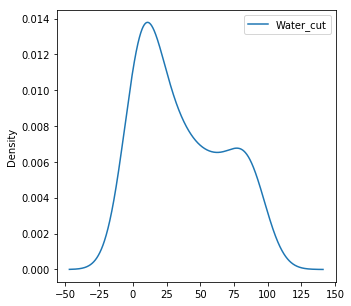

In [36]:
df.head(1000).plot(y='Water_cut',kind='kde',figsize=(5,5))

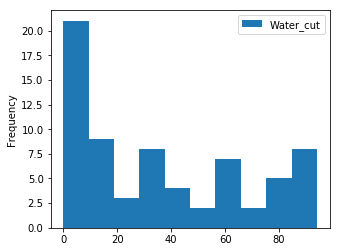

In [37]:
df.head(1000).plot(y='Water_cut',kind='hist',figsize=(5,4))

### Сохранение данных

In [38]:
df_res = df.head()

In [39]:
df_res.to_csv('filename.csv',index=False)

In [40]:
df_res.to_excel('filename.xlsx',index=False)

# Полезные ссылки:
- [Документация Pandas ](https://pandas.pydata.org/pandas-docs/stable/index.html)
- [Средние величины](https://ru.wikipedia.org/wiki/%D0%9A%D0%B0%D1%82%D0%B5%D0%B3%D0%BE%D1%80%D0%B8%D1%8F:%D0%A1%D1%80%D0%B5%D0%B4%D0%BD%D0%B8%D0%B5_%D0%B2%D0%B5%D0%BB%D0%B8%D1%87%D0%B8%D0%BD%D1%8B)
- [Видео-туториалы Pandas на английском](https://www.youtube.com/watch?v=CmorAWRsCAw#action=share)


### Дополнительные материалы - теория и практика

#### Объединение датафреймов
Если данные берутся из нескольких источников, которые имеют общие идентификаторы, то объединить их можно методом **merge()**. Этот метод довольно гибкий - можно указывать имена колонок для объединения в каждом из датафремов, указывать тип объединения и др.

Тип объединения обычно выбирают в зависимости от конечной цели: если мы хотим сохранить обсолютно все объекты из обоих источников, даже при условии, что они будут почти не заполнены, можно выбрать тип "*outer*" .
Если у нас есть один наиболее доверенный источник, в качестве данных которого мы уверены, то можно присодинять данные из других источников с указанием типа "*left*" - в этом случае объекты, которых не будет в первом источнике, также не попадут и в конечный датафрейм.

Типу объединения соответствуют два понятия из теории множеста: **a.merge(b, how="inner")** - *пересечение множеств* a и b,
**a.merge(b, how="outer")** - *объединение множеств* a и b.

Ниже приведены несколько примеров объединения с помощью метода **merge()**.

In [43]:
# создадим два игрушечных датасета с разным набром объектов и разными колонками, чтобы увидеть
# как работают различные типы объединения
a = pd.DataFrame({'UID':[0,1,2,3,4,5],
                  'Должность':['Инженер','Инженер','Заместитель директора', 'Менеджер','Главный инженер','Менеджер'],
                  'Оклад (тыс.руб)':[35, 38, 95, 35, 58, 32]})

b = pd.DataFrame({'UID':[0,1,2,3,4],
                  'Возраст':[23,32,40,25,50],
                  'Образование':['Среднее специальное','Высшее','Высшее','Среднее специальное','К.т.н']})

In [42]:
a.merge(b, on='UID', how='outer')

,UID,Должность,Оклад (тыс.руб),Возраст,Образование
0,0,Инженер,35,23.0,Среднее специальное
1,1,Инженер,38,32.0,Высшее
2,2,Заместитель директора,95,40.0,Высшее
3,3,Менеджер,35,25.0,Среднее специальное
4,4,Главный инженер,58,50.0,К.т.н
5,5,Менеджер,32,NaN,NaN


In [44]:
a.merge(b, on='UID', how='inner')

,UID,Должность,Оклад (тыс.руб),Возраст,Образование
0,0,Инженер,35,23,Среднее специальное
1,1,Инженер,38,32,Высшее
2,2,Заместитель директора,95,40,Высшее
3,3,Менеджер,35,25,Среднее специальное
4,4,Главный инженер,58,50,К.т.н


In [45]:
# предположим, что мы хотим посмотреть размеры окладов в разрезе возраста и образования
# в этом случае outer тип для нас бесполезен - так как не принёсёт в данные нужной информации
df = a.merge(b, on='UID', how='inner')
df

,UID,Должность,Оклад (тыс.руб),Возраст,Образование
0,0,Инженер,35,23,Среднее специальное
1,1,Инженер,38,32,Высшее
2,2,Заместитель директора,95,40,Высшее
3,3,Менеджер,35,25,Среднее специальное
4,4,Главный инженер,58,50,К.т.н


In [46]:
# посмотрим на средние оклады людей до 35 (включительно) и после 35
round(df[df['Возраст'] <= 30]['Оклад (тыс.руб)'].mean(),2),round(df[df['Возраст'] > 30]['Оклад (тыс.руб)'].mean(),2)

(35.0, 63.67)

In [47]:
# теперь сгруппируем наш датафрейм по типу образования и посмотрим на статистику по окладу
df.groupby('Образование')['Оклад (тыс.руб)'].mean()

Образование
Высшее                 66.5
К.т.н                  58.0
Среднее специальное    35.0
Name: Оклад (тыс.руб), dtype: float64

In [48]:
# теперь предположим, что нам дали дополнительные данные по сотрудникам из филиалов компании
# мы должны присоединить их к нашему датасету и рассчитать интересующие показатели заново
a = pd.DataFrame({'UID':[101, 200, 202, 408, 501],
                  'Должность':['Инженер','Менеджер','Старший инженер','Инженер','Оператор поддержки'],
                  'Оклад (тыс.руб)':[38, 27, 45, 35, 20]})

b = pd.DataFrame({'UID':[101, 200, 202, 408, 501],
                  'Возраст':[37, 38, 45, 28, 21],
                  'Образование':['Высшее','Высшее','Высшее','Среднее специальное','Среднее']})

df_add = a.merge(b, on='UID', how='inner')

In [49]:
# объединим датафремы
df = pd.concat([df, df_add]) # метод concat принимает список из датафреймов, у которых должны быть одинаковые колонки

In [50]:
round(df[df['Возраст'] <= 30]['Оклад (тыс.руб)'].mean(),2),round(df[df['Возраст'] > 30]['Оклад (тыс.руб)'].mean(),2)

(31.25, 50.17)

In [50]:
df.groupby('Образование')['Оклад (тыс.руб)'].mean()

Образование
Высшее                 48.6
К.т.н                  58.0
Среднее                20.0
Среднее специальное    35.0
Name: Оклад (тыс.руб), dtype: float64

#### Оконные функции.
Для работы с рапсределёнными во времени данных в pandas существуют оконные функции - они позволяют вычислить агрегаты в рамках небольших временных периодов, так называемых "окон", которые можно сдвигать на заданный шаг для повторения рассчётов.
В pandas реализовано несколько методов для работы с распределёнными во времени данными:
- pandas.rolling() - позволяет произвести оконные вычисления с любой произвольной функцией в рамках заданного окна
- pandas.expanding() - позвояет произвести куммулятивные вычисления с любой произвольной функцией для заданного размера окна
- pandas.ewm() - позволяет "сгладить" данные, подробное описание можно прочесть в документации к pandas

In [51]:
# представим, что теперь для каждого сотрудника из предыдущего пункта мы решили проанализировать его предыдущую
# трудовую деятельность : длительность работы на каждом месте, рост дохода
a = pd.DataFrame({'UID':[1, 1, 2, 2, 2, 2, 408, 408, 501],
                 'Company_ID':[100, 304, 202, 35, 78, 23, 90, 23, 10],
                 'Дата начала работы':['2000-09-01',
                                       '2005-12-15',
                                       '2003-05-07',
                                       '2006-08-02',
                                       '2011-10-07',
                                       '2017-11-15',
                                       '2013-02-02',
                                       '2016-09-25',
                                       '2018-07-30'
                                      ],
                 'Дата окончания работы':['2005-11-04',
                                          '2015-03-03',
                                          '2006-07-24',
                                           '2011-10-01',
                                           '2016-10-20',
                                           '2019-11-08',
                                          '2016-06-04',
                                          '2018-09-20',
                                          '2019-05-14'],
                 'Оклад (тыс.руб)':[26, 35, 30, 48, 54, 79, 21, 32, 17]})

In [52]:
# приведём даты к нужному типу, чтобы они корректно отобразились на графике
a['Дата начала работы'] = pd.to_datetime(a['Дата начала работы'])
a['Дата окончания работы'] = pd.to_datetime(a['Дата окончания работы'])

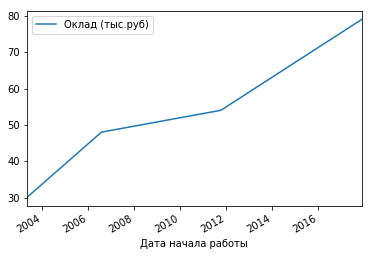

In [53]:
# Отрисуем, как менялся оклад работника с UID=2 по годам
a[a['UID'] == 2].plot(x='Дата начала работы',y='Оклад (тыс.руб)')

In [71]:
# сгруппируем работников по UID, посмотрим среднее на двух последних местах работы по окладу
a_grouped = a.groupby('UID')
print a_grouped
a_grouped['Оклад (тыс.руб)'].rolling(2).mean()

UID   
1    0     NaN
     1    30.5
2    2     NaN
     3    39.0
     4    51.0
     5    66.5
408  6     NaN
     7    26.5
501  8     NaN
Name: Оклад (тыс.руб), dtype: float64